In [1]:
%pip install -qU langgraph langchain-openai

Note: you may need to restart the kernel to use updated packages.


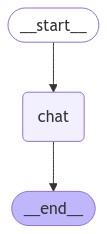

Assistant: Hello! How can I assist you today?
Assistant: I’m an AI language model created by OpenAI, designed to assist with a wide variety of questions and topics. How can I help you today?


KeyboardInterrupt: Interrupted by user

In [5]:
from typing import TypedDict, Annotated
from langchain_openai import ChatOpenAI
from langgraph.graph.message import add_messages
from langgraph.graph import StateGraph
from IPython.display import Image, display
from getpass import getpass

key=getpass()

llm = ChatOpenAI(
    model="gpt-4o-mini",
    api_key=key,
    base_url="https://api.apiyi.com/v1"
)

# state in pydantic 
class State(TypedDict):
    messages: Annotated[list, add_messages]

# chat node, invoke llm given msg in state
def chat(state: State):
    return {"messages": [llm.invoke(state["messages"])]}

# build state graph & add node
workflow = StateGraph(State)
workflow.add_node(chat)

# set entry & finish point
workflow.set_entry_point("chat")
#workflow.add_edge("chat", "__end__")
workflow.set_finish_point("chat")
graph = workflow.compile()

# draw graph
try:
    display(Image(graph.get_graph().draw_mermaid_png()))
except Exception:
    pass

while True:
    user_input = input("User: ")
    if user_input.lower() in ["quit", "exit", "q"]:
        print("Goodbye!")
        break
    for event in graph.stream({"messages": ("user", user_input)}):
        for value in event.values():
            # print content of last msg
            print("Assistant:", value["messages"][-1].content)